# Reference Dataset
GSE242424/23
Paper: https://www.ncbi.nlm.nih.gov/pmc/articles/PMC10592962/

GEO: https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE242424



In [7]:
import scanpy as sc
import pandas as pd
import scipy.io
import anndata
import numpy as np
import matplotlib.pyplot as plt
import scipy.sparse

In [2]:
# Paths
reference_path = "/Volumes/BioinforSSD/DATASETS_JUNE/REFERENCE_DATASET_GSE242424:23/scRNA/"
c_data_path = "/Volumes/BioinforSSD/DATASETS_JUNE/DEMO_DATASETS_scGPT/ms/c_data.h5ad"

In [3]:
# Load the gene expression matrix
gene_exp_matrix = scipy.io.mmread(reference_path + "gene_x_cell.mtx.gz").tocsr().T

In [4]:
# Load gene names
with open(reference_path + "genes.txt", "r") as f:
    gene_names = f.read().splitlines()

In [5]:
# Load cell metadata
cell_metadata = pd.read_csv(reference_path + "cells.tsv", sep="\t")

In [6]:
# Create AnnData object
var_df = pd.DataFrame(index=[str(gene) for gene in gene_names])
adata = anndata.AnnData(X=gene_exp_matrix, obs=cell_metadata, var=var_df)

/opt/anaconda3/envs/scanpy_env/lib/python3.10/site-packages/anndata/_core/aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


In [7]:
# Lets explore the metadata in the object adata to see the columns, values, etc..
print("Available columns in cell metadata:")
print(adata.obs.columns)

if 'cluster' in adata.obs.columns:
    print("\nUnique values in 'cluster' column:")
    print(adata.obs['cluster'].value_counts())
    print("\nFirst few rows of 'cluster' column:")
    print(adata.obs['cluster'].head())

# Check for other potential celltype columns
potential_celltype_columns = [col for col in adata.obs.columns if 'type' in col.lower() or 'cluster' in col.lower() or 'label' in col.lower()]
if potential_celltype_columns:
    print("\nOther potential celltype columns found:")
    for col in potential_celltype_columns:
        print(f"\n{col}:")
        print(adata.obs[col].value_counts())
        print(f"First few rows of '{col}':")
        print(adata.obs[col].head())

print("\nShape of adata:", adata.shape)
print("Number of unique values in 'cluster':", adata.obs['cluster'].nunique() if 'cluster' in adata.obs.columns else "N/A")

Available columns in cell metadata:
Index(['nCount_RNA', 'nFeature_RNA', 'sample', 'percent.mt', 'percent.oskm',
       'cluster', 'umap1', 'umap2', 'barcode_sample'],
      dtype='object')

Unique values in 'cluster' column:
cluster
1     11041
3     10306
12     7217
14     6553
11     4468
10     4445
4      3287
5      3183
15     3125
13     1863
8      1707
6       934
9       586
7       523
2       140
Name: count, dtype: int64

First few rows of 'cluster' column:
0    1
1    1
2    1
3    1
4    1
Name: cluster, dtype: int64

Other potential celltype columns found:

cluster:
cluster
1     11041
3     10306
12     7217
14     6553
11     4468
10     4445
4      3287
5      3183
15     3125
13     1863
8      1707
6       934
9       586
7       523
2       140
Name: count, dtype: int64
First few rows of 'cluster':
0    1
1    1
2    1
3    1
4    1
Name: cluster, dtype: int64

Shape of adata: (59378, 29165)
Number of unique values in 'cluster': 15


In [8]:
# Set the cell type column
adata.obs['celltype'] = adata.obs['cluster']


In [9]:
# Verify that 'celltype' and 'cluster' are identical
if (adata.obs['celltype'] == adata.obs['cluster']).all():
    print("'celltype' and 'cluster' columns are identical.")
else:
    print("Warning: 'celltype' and 'cluster' columns differ.")

# Print unique celltypes
print("\nUnique celltypes:")
print(adata.obs['celltype'].value_counts())

# If you have a mapping of these numeric values to descriptive labels, you can apply it like this:
# Replace this dictionary with the actual mapping if you have it
# In this case, this mapping was obtained fro ma picture of the paper where this is described, so it is good.
celltype_map = {
    '1': 'Fibroblast',
    '2': 'Fibroblast-like',
    '3': 'Fibroblast-like',
    '4': 'Fibroblast-like',
    '5': 'Fibroblast-like',
    '6': 'Keratinocyte-like',
    '7': 'High OSK (hOSK)',
    '8': 'Extreme OSK (xOSK)',
    '9': 'Intermediate',
    '10': 'Partial',
    '11': 'Intermediate',
    '12': 'Intermediate',
    '13': 'Pre-iPSC',
    '14': 'Pre-iPSC',
    '15': 'iPSC'
}

# Apply the mapping
adata.obs['celltype_label'] = adata.obs['celltype'].astype(str).map(celltype_map)

# Print the new celltype labels
print("\nCelltype labels after mapping:")
print(adata.obs['celltype_label'].value_counts())

# If you don't have a mapping, you can keep the numeric labels
# In this case, we don't need to do anything as 'celltype' already contains the information we need

# Verify the celltype information
print("\nFirst few rows of celltype information:")
print(adata.obs[['celltype', 'celltype_label']].head())

# Save the updated AnnData object
adata.write("reprogramming_reference_data.h5ad")

'celltype' and 'cluster' columns are identical.

Unique celltypes:
celltype
1     11041
3     10306
12     7217
14     6553
11     4468
10     4445
4      3287
5      3183
15     3125
13     1863
8      1707
6       934
9       586
7       523
2       140
Name: count, dtype: int64

Celltype labels after mapping:
celltype_label
Fibroblast-like       16916
Intermediate          12271
Fibroblast            11041
Pre-iPSC               8416
Partial                4445
iPSC                   3125
Extreme OSK (xOSK)     1707
Keratinocyte-like       934
High OSK (hOSK)         523
Name: count, dtype: int64

First few rows of celltype information:
   celltype celltype_label
0         1     Fibroblast
1         1     Fibroblast
2         1     Fibroblast
3         1     Fibroblast
4         1     Fibroblast


In [10]:
# let's get the values of the column celltype_label to the column celltype and then erase celltype_label
import scanpy as sc

def transfer_celltype_label(adata):
    if 'celltype_label' in adata.obs.columns:
        if 'celltype' not in adata.obs.columns:
            adata.obs['celltype'] = adata.obs['celltype_label']
        else:
            print("Warning: 'celltype' column already exists. Overwriting with 'celltype_label' values.")
            adata.obs['celltype'] = adata.obs['celltype_label']
        adata.obs = adata.obs.drop(columns=['celltype_label'])
        print("Transferred 'celltype_label' to 'celltype' and removed 'celltype_label' column.")
    else:
        print("No 'celltype_label' column found. No changes made.")
    return adata

# Load your dataset
adata = sc.read_h5ad("reprogramming_reference_data.h5ad")

# Apply the transfer function
adata = transfer_celltype_label(adata)

# Save the updated dataset
adata.write_h5ad("reprogramming_reference_data_updated.h5ad")
print("Updated dataset saved.")

# Verify the changes
print("\nUpdated metadata columns:")
print(adata.obs.columns)
if 'celltype' in adata.obs.columns:
    print("\nUnique values in 'celltype' column:")
    print(adata.obs['celltype'].value_counts())

Transferred 'celltype_label' to 'celltype' and removed 'celltype_label' column.
Updated dataset saved.

Updated metadata columns:
Index(['nCount_RNA', 'nFeature_RNA', 'sample', 'percent.mt', 'percent.oskm',
       'cluster', 'umap1', 'umap2', 'barcode_sample', 'celltype'],
      dtype='object')

Unique values in 'celltype' column:
celltype
Fibroblast-like       16916
Intermediate          12271
Fibroblast            11041
Pre-iPSC               8416
Partial                4445
iPSC                   3125
Extreme OSK (xOSK)     1707
Keratinocyte-like       934
High OSK (hOSK)         523
Name: count, dtype: int64


In [11]:
# Load UMAP coordinates
adata.obsm['X_umap'] = adata.obs[['umap1', 'umap2']].values

In [12]:
# Load PCA coordinates

def load_pca_file(file_path):
    try:
        # Read the first line to get column names
        with open(file_path, 'r') as f:
            header = f.readline().strip().split('\t')
        
        # Read the rest of the file, specifying the column names
        pca = pd.read_csv(file_path, sep='\t', header=None, skiprows=1, names=['barcode'] + header)
        print("PCA file loaded successfully.")
        return pca
    except Exception as e:
        print(f"Error loading PCA file: {e}")
        return None

# Usage
reference_path = "/Volumes/BioinforSSD/DATASETS_JUNE/REFERENCE_DATASET_GSE242424:23/scRNA/"
pca_file_path = reference_path + "pca.tsv"

# Try to load the PCA file
pca = load_pca_file(pca_file_path)

if pca is not None:
    print("PCA shape:", pca.shape)
    print("First few rows of PCA:")
    print(pca.head())
    
    # Add PCA to AnnData object
    adata.obsm['X_pca'] = pca.iloc[:, 1:].values  # Exclude the barcode column
    print("PCA added to AnnData object.")
else:
    print("Failed to load PCA. Please check the file manually.")

PCA file loaded successfully.
PCA shape: (59378, 51)
First few rows of PCA:
              barcode      PCA_1     PCA_2     PCA_3     PCA_4     PCA_5  \
0  AAACCCAAGAGTGACC-1 -14.286304  3.451325  0.923703  2.871986 -7.199635   
1  AAACCCAAGTGCCAGA-1 -16.353130  4.879011 -0.748888  3.665221 -7.975323   
2  AAACCCACACCATTCC-1 -11.697842  2.341138  0.295539  0.121124 -6.439976   
3  AAACCCACACGCGTCA-1 -10.881275  2.575614 -0.056426  0.792935 -4.756712   
4  AAACCCAGTCCATAGT-1 -11.859165  3.901252  2.037614  2.247822 -3.339677   

       PCA_6     PCA_7     PCA_8     PCA_9  ...    PCA_41    PCA_42    PCA_43  \
0 -10.536843 -3.675245 -0.724327 -1.016364  ... -0.510998  0.981009 -1.384784   
1  -9.650569 -5.335836 -1.555241 -1.762190  ... -1.642878  2.881816 -0.396661   
2  -6.814155 -2.560958 -0.393530 -1.330962  ... -0.325268 -1.117522  0.398160   
3  -9.548315 -4.042646  0.924885 -0.625573  ... -0.695545 -0.367261  0.727642   
4  -7.082760 -0.489517 -0.965737 -0.829460  ...  0.195710 -1.1

In [13]:
print(adata.obsm['X_pca'].shape)

(59378, 50)


In [14]:
import scanpy as sc
sc.pp.neighbors(adata, use_rep='X_pca')
sc.tl.umap(adata)

/opt/anaconda3/envs/scanpy_env/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


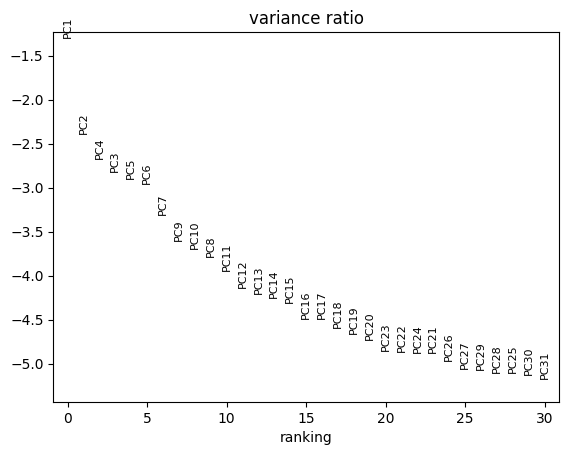

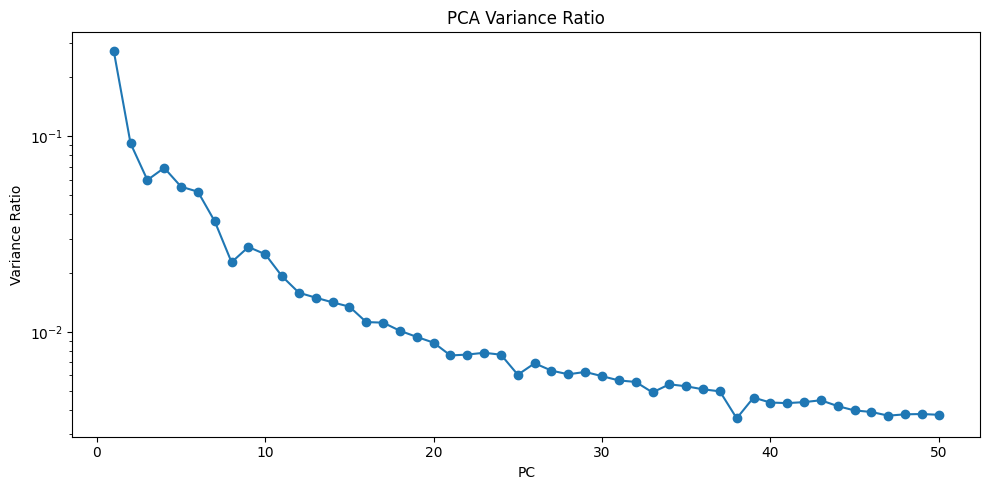

Cumulative variance explained:
PC10: 71.32%
PC20: 84.17%
PC50: 100.00%


In [15]:
import numpy as np
import scanpy as sc
import matplotlib.pyplot as plt

# Calculate variance ratio
pca_variance = np.var(adata.obsm['X_pca'], axis=0)
pca_variance_ratio = pca_variance / np.sum(pca_variance)

# Store the results in adata.uns
adata.uns['pca'] = {
    'variance': pca_variance,
    'variance_ratio': pca_variance_ratio
}

# Now we can plot the variance ratio
sc.pl.pca_variance_ratio(adata, log=True)

# If you want to create a custom plot, you can do:
plt.figure(figsize=(10, 5))
plt.plot(range(1, len(pca_variance_ratio) + 1), pca_variance_ratio, 'o-')
plt.xlabel('PC')
plt.ylabel('Variance Ratio')
plt.title('PCA Variance Ratio')
plt.yscale('log')
plt.tight_layout()
plt.show()

# Print cumulative variance explained
cumulative_variance_ratio = np.cumsum(pca_variance_ratio)
print("Cumulative variance explained:")
print(f"PC10: {cumulative_variance_ratio[9]:.2%}")
print(f"PC20: {cumulative_variance_ratio[19]:.2%}")
print(f"PC50: {cumulative_variance_ratio[49]:.2%}")

# Save the updated AnnData object
adata.write_h5ad("reprogramming_reference_data_with_pca.h5ad")

In [16]:
# Basic preprocessing (if needed)
sc.pp.filter_cells(adata, min_genes=200)
sc.pp.filter_genes(adata, min_cells=3)

In [17]:
# Save as h5ad
adata.write("reprogramming_reference_data.h5ad")

In [8]:
# lets check which column has the info of the differnt timepoints
# Display unique values and distribution for each categorical column
for column in adata.obs.select_dtypes(include=['category', 'object']).columns:
    print(f"\nUnique values in '{column}' column:")
    print(adata.obs[column].unique())
    
    print(f"\nDistribution of {column}:")
    print(adata.obs[column].value_counts())

    # If the column is 'sample', print more detailed information
    if column == 'sample':
        print("\nDetailed information for 'sample' column:")
        print(adata.obs['sample'].value_counts())


Unique values in 'sample' column:
['D0', 'D2', 'D4', 'D6', 'D8', 'D10', 'D12', 'D14', 'iPSC']
Categories (9, object): ['D0', 'D2', 'D4', 'D6', ..., 'D10', 'D12', 'D14', 'iPSC']

Distribution of sample:
sample
D10     10443
D0       9759
D6       7835
D14      7534
D12      7194
D8       5528
D4       5330
iPSC     3125
D2       2630
Name: count, dtype: int64

Detailed information for 'sample' column:
sample
D10     10443
D0       9759
D6       7835
D14      7534
D12      7194
D8       5528
D4       5330
iPSC     3125
D2       2630
Name: count, dtype: int64

Unique values in 'barcode_sample' column:
['AAACCCAAGAGTGACC-1' 'AAACCCAAGTGCCAGA-1' 'AAACCCACACCATTCC-1' ...
 'TTTGGTTTCTCTTAAC-9' 'TTTGTTGGTAGTGTGG-9' 'TTTGTTGTCCGTAGTA-9']

Distribution of barcode_sample:
barcode_sample
AAACCCAAGAGTGACC-1    1
TCCTTCTGTGGCGTAA-6    1
TCCTTCTTCAAATGCC-6    1
TCCTTCTTCACCTGTC-6    1
TCCTTCTTCCCATAGA-6    1
                     ..
CAGATCACATGACGAG-4    1
CAGATCACATGGCTGC-4    1
CAGATCAGTCGCGTCA-4  

In [7]:
# Now lets check more in detail the dataset. when asked, use as imput: 1
import scanpy as sc
import pandas as pd
import os

# Load the data
adata = sc.read_h5ad("reprogramming_reference_data.h5ad")

print("\nColumns in adata.obs:")
print(adata.obs.columns)

print("\nColumns in adata.var:")
print(adata.var.columns)

print("\nShape of adata:", adata.shape)

# Display unique values and distribution for each categorical column
for column in adata.obs.select_dtypes(include=['category', 'object']).columns:
    print(f"\nUnique values in '{column}' column:")
    print(adata.obs[column].unique())
    
    print(f"\nDistribution of {column}:")
    print(adata.obs[column].value_counts())

# Function to split AnnData by a given column
def split_adata_by_column(adata, column_name):
    if column_name not in adata.obs.columns:
        print(f"Error: Column '{column_name}' not found in adata.obs")
        return

    unique_values = adata.obs[column_name].unique()
    
    output_dir = f"split_{column_name}"
    os.makedirs(output_dir, exist_ok=True)
    
    for value in unique_values:
        adata_subset = adata[adata.obs[column_name] == value].copy()
        output_filename = f"{output_dir}/adata_{value.replace(' ', '_')}.h5ad"
        adata_subset.write_h5ad(output_filename)
        print(f"Saved {output_filename}")

# Ask user which column to use for splitting
print("\nAvailable columns for splitting:")
for i, column in enumerate(adata.obs.select_dtypes(include=['category', 'object']).columns):
    print(f"{i+1}. {column}")

column_choice = input("\nEnter the number of the column you want to use for splitting: ")
column_to_split = list(adata.obs.select_dtypes(include=['category', 'object']).columns)[int(column_choice) - 1]

# Split the AnnData object
split_adata_by_column(adata, column_to_split)

print("\nSplitting complete.")


Columns in adata.obs:
Index(['nCount_RNA', 'nFeature_RNA', 'sample', 'percent.mt', 'percent.oskm',
       'cluster', 'umap1', 'umap2', 'barcode_sample', 'celltype', 'n_genes'],
      dtype='object')

Columns in adata.var:
Index(['n_cells'], dtype='object')

Shape of adata: (59378, 28025)

Unique values in 'sample' column:
['D0', 'D2', 'D4', 'D6', 'D8', 'D10', 'D12', 'D14', 'iPSC']
Categories (9, object): ['D0', 'D2', 'D4', 'D6', ..., 'D10', 'D12', 'D14', 'iPSC']

Distribution of sample:
sample
D10     10443
D0       9759
D6       7835
D14      7534
D12      7194
D8       5528
D4       5330
iPSC     3125
D2       2630
Name: count, dtype: int64

Unique values in 'barcode_sample' column:
['AAACCCAAGAGTGACC-1' 'AAACCCAAGTGCCAGA-1' 'AAACCCACACCATTCC-1' ...
 'TTTGGTTTCTCTTAAC-9' 'TTTGTTGGTAGTGTGG-9' 'TTTGTTGTCCGTAGTA-9']

Distribution of barcode_sample:
barcode_sample
AAACCCAAGAGTGACC-1    1
TCCTTCTGTGGCGTAA-6    1
TCCTTCTTCAAATGCC-6    1
TCCTTCTTCACCTGTC-6    1
TCCTTCTTCCCATAGA-6    1
    

In [10]:
# Lets check, just to know, which cell types we have on each timepoint.
import scanpy as sc
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
adata = sc.read_h5ad("reprogramming_reference_data.h5ad")

# Create a cross-tabulation of sample (days) and cell types
celltype_by_day = pd.crosstab(adata.obs['sample'], adata.obs['celltype'])

# Display the cross-tabulation
print("Cell type distribution by day:")
print(celltype_by_day)

# Calculate the percentage of each cell type per day
celltype_percentage = celltype_by_day.div(celltype_by_day.sum(axis=1), axis=0) * 100

# Create a stacked bar plot
plt.figure(figsize=(15, 10))
celltype_percentage.plot(kind='bar', stacked=True)
plt.title('Cell Type Distribution by Day')
plt.xlabel('Day')
plt.ylabel('Percentage')
plt.legend(title='Cell Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig('celltype_distribution_by_day.png')
plt.close()

# Create a heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(celltype_percentage, annot=True, fmt='.1f', cmap='YlOrRd')
plt.title('Cell Type Distribution by Day (Percentage)')
plt.xlabel('Cell Type')
plt.ylabel('Day')
plt.tight_layout()
plt.savefig('celltype_distribution_heatmap.png')
plt.close()

print("Analysis complete. Check the console output for the distribution table.")
print("Two visualizations have been saved:")
print("1. celltype_distribution_by_day.png - Stacked bar plot")
print("2. celltype_distribution_heatmap.png - Heatmap")

Cell type distribution by day:
celltype  Extreme OSK (xOSK)  Fibroblast  Fibroblast-like  High OSK (hOSK)  \
sample                                                                       
D0                         0        9749               10                0   
D2                       600        1247              112              296   
D4                       767           0             2453              227   
D6                       340           7             3157                0   
D8                         0           7             3212                0   
D10                        0           0             5237                0   
D12                        0          25             1829                0   
D14                        0           6              906                0   
iPSC                       0           0                0                0   

celltype  Intermediate  Keratinocyte-like  Partial  Pre-iPSC  iPSC  
sample                                   

<Figure size 1500x1000 with 0 Axes>

In [1]:
import scanpy as sc
import pandas as pd

# Load the data
adata = sc.read_h5ad("reprogramming_reference_data.h5ad")

# Check unique values in the 'sample' column
unique_samples = adata.obs['sample'].unique()

print("Unique values in the 'sample' column:")
for sample in sorted(unique_samples):
    print(sample)

# Get the count of each unique value
sample_counts = adata.obs['sample'].value_counts().sort_index()

print("\nCount of each unique value in the 'sample' column:")
print(sample_counts)

# Calculate the percentage of each sample
sample_percentages = (sample_counts / len(adata)) * 100

print("\nPercentage of each unique value in the 'sample' column:")
for sample, percentage in sample_percentages.items():
    print(f"{sample}: {percentage:.2f}%")

Unique values in the 'sample' column:
D0
D10
D12
D14
D2
D4
D6
D8
iPSC

Count of each unique value in the 'sample' column:
sample
D0       9759
D2       2630
D4       5330
D6       7835
D8       5528
D10     10443
D12      7194
D14      7534
iPSC     3125
Name: count, dtype: int64

Percentage of each unique value in the 'sample' column:
D0: 16.44%
D2: 4.43%
D4: 8.98%
D6: 13.20%
D8: 9.31%
D10: 17.59%
D12: 12.12%
D14: 12.69%
iPSC: 5.26%


In [1]:
# Now we explore again the h5ad file FINAL GOOD EXPLORE CODE FOR H5AD FILES

import scanpy as sc
import pandas as pd
import numpy as np

# Load the data
adata = sc.read_h5ad("/Volumes/BioinforSSD/DATASETS_JUNE/REFERENCE_DATASET_GSE242424:23/READY_TO_USE_ON_scGPT_AS_REFERENCE_DATASET/reprogramming_reference_data.h5ad")

print("AnnData object information:")
print(adata)

print("\nShape of adata:", adata.shape)

print("\nColumns in adata.obs:")
print(adata.obs.columns)

print("\nFirst few rows of adata.obs:")
print(adata.obs.head())

print("\nColumns in adata.var:")
print(adata.var.columns)

print("\nFirst few rows of adata.var:")
print(adata.var.head())

print("\nLayers in adata:")
print(list(adata.layers.keys()))

# Function to print unique values
def print_unique_values(df, name, max_values=10):
    print(f"\nSample of unique values in {name}:")
    for column in df.columns:
        unique_values = df[column].unique()
        print(f"\n{column}:")
        if df[column].dtype == 'object' or df[column].dtype.name == 'category':
            print(list(unique_values[:max_values]) + (["..."] if len(unique_values) > max_values else []))
        elif np.issubdtype(df[column].dtype, np.number):
            if len(unique_values) > max_values:
                print(f"Min: {unique_values.min()}, Max: {unique_values.max()}")
            else:
                print(list(unique_values))
        else:
            print(list(unique_values[:max_values]) + (["..."] if len(unique_values) > max_values else []))
        print(f"Total unique values: {len(unique_values)}")

print_unique_values(adata.obs, "adata.obs")
print_unique_values(adata.var, "adata.var")

AnnData object information:
AnnData object with n_obs × n_vars = 59378 × 28025
    obs: 'nCount_RNA', 'nFeature_RNA', 'sample', 'percent.mt', 'percent.oskm', 'cluster', 'umap1', 'umap2', 'barcode_sample', 'celltype', 'n_genes'
    var: 'n_cells'
    uns: 'neighbors', 'pca', 'umap'
    obsm: 'X_pca', 'X_umap'
    obsp: 'connectivities', 'distances'

Shape of adata: (59378, 28025)

Columns in adata.obs:
Index(['nCount_RNA', 'nFeature_RNA', 'sample', 'percent.mt', 'percent.oskm',
       'cluster', 'umap1', 'umap2', 'barcode_sample', 'celltype', 'n_genes'],
      dtype='object')

First few rows of adata.obs:
   nCount_RNA  nFeature_RNA sample  percent.mt  percent.oskm  cluster  \
0       13707          3472     D0    4.238710      0.007296        1   
1       12326          3497     D0    5.719617      0.016226        1   
2       14442          3996     D0    4.216867      0.013848        1   
3        8813          2793     D0    4.788381      0.011347        1   
4       12115          

In [7]:
import scanpy as sc
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from scipy import sparse

# Cargar el dataset
adata = sc.read_h5ad("/Volumes/BioinforSSD/DATASETS_JUNE/REFERENCE_DATASET_GSE242424:23/READY_TO_USE_ON_scGPT_AS_REFERENCE_DATASET/reprogramming_reference_data.h5ad")

# 1. Distribución de células por punto temporal y tipo celular
cell_counts = adata.obs['sample'].value_counts().sort_index()
cell_type_counts = adata.obs.groupby('sample')['celltype'].value_counts().unstack().fillna(0)

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 16))
cell_counts.plot(kind='bar', ax=ax1)
ax1.set_title('Número de células por punto temporal')
ax1.set_ylabel('Número de células')
cell_type_counts.plot(kind='bar', stacked=True, ax=ax2)
ax2.set_title('Distribución de tipos celulares por punto temporal')
ax2.set_ylabel('Número de células')
plt.tight_layout()
plt.savefig('cell_distribution.png')
plt.close()


# Información adicional para el informe
print(f"Número total de células: {adata.n_obs}")
print(f"Número total de genes: {adata.n_vars}")
print(f"Puntos temporales: {', '.join(adata.obs['sample'].unique())}")
print(f"Tipos celulares: {', '.join(adata.obs['celltype'].unique())}")
print(f"Rango de genes por célula: {adata.obs['nFeature_RNA'].min()} - {adata.obs['nFeature_RNA'].max()}")
print(f"Rango de UMIs por célula: {adata.obs['nCount_RNA'].min()} - {adata.obs['nCount_RNA'].max()}")
print(f"Mediana de genes por célula: {adata.obs['nFeature_RNA'].median()}")
print(f"Mediana de UMIs por célula: {adata.obs['nCount_RNA'].median()}")

Número total de células: 59378
Número total de genes: 28025
Puntos temporales: D0, D2, D4, D6, D8, D10, D12, D14, iPSC
Tipos celulares: Fibroblast, Fibroblast-like, High OSK (hOSK), Extreme OSK (xOSK), Keratinocyte-like, Intermediate, Partial, Pre-iPSC, iPSC
Rango de genes por célula: 474 - 9261
Rango de UMIs por célula: 2001 - 99728
Mediana de genes por célula: 3553.0
Mediana de UMIs por célula: 13162.0


/var/folders/n_/7v5qzhkd1hx_rx4s52x9zk8r0000gn/T/ipykernel_46264/535082894.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cell_type_counts = adata.obs.groupby('sample')['celltype'].value_counts().unstack().fillna(0)


/var/folders/n_/7v5qzhkd1hx_rx4s52x9zk8r0000gn/T/ipykernel_46264/316912427.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cell_type_counts = adata.obs.groupby('sample')['celltype'].value_counts().unstack().fillna(0)


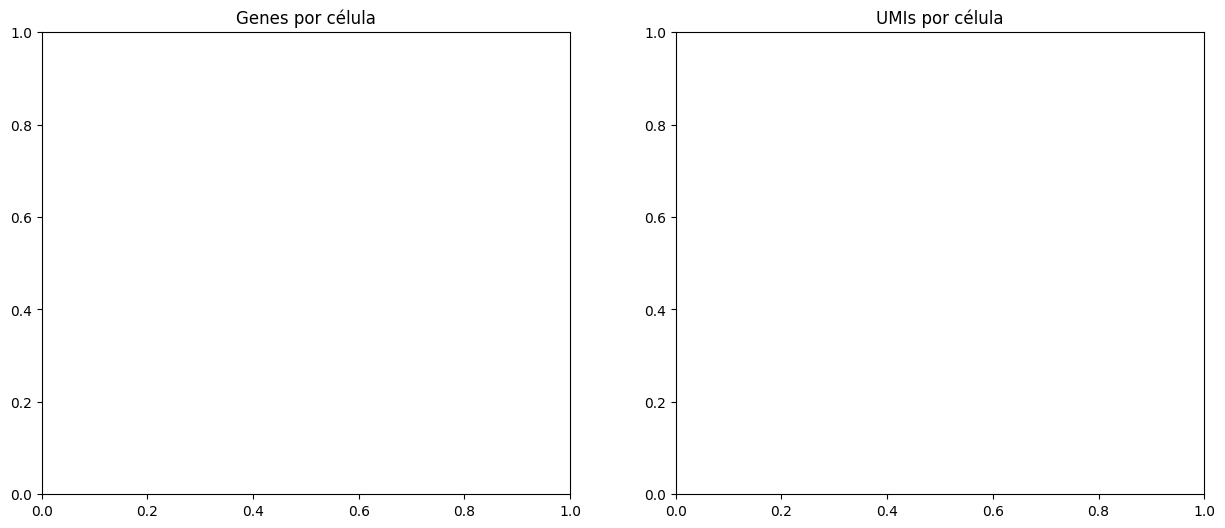

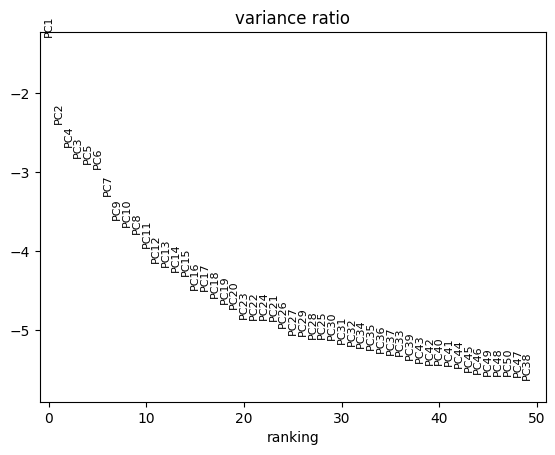

Gráficos guardados como archivos PNG.
Número total de células: 59378
Número total de genes: 28025
Puntos temporales: D0, D2, D4, D6, D8, D10, D12, D14, iPSC
Tipos celulares: Fibroblast, Fibroblast-like, High OSK (hOSK), Extreme OSK (xOSK), Keratinocyte-like, Intermediate, Partial, Pre-iPSC, iPSC
Rango de genes por célula: 474 - 9261
Rango de UMIs por célula: 2001 - 99728
Mediana de genes por célula: 3553.0
Mediana de UMIs por célula: 13162.0


In [10]:
import scanpy as sc
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from scipy import sparse



# 1. Distribución de células por punto temporal y tipo celular
cell_counts = adata.obs['sample'].value_counts().sort_index()
cell_type_counts = adata.obs.groupby('sample')['celltype'].value_counts().unstack().fillna(0)

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 16))
cell_counts.plot(kind='bar', ax=ax1)
ax1.set_title('Número de células por punto temporal')
ax1.set_ylabel('Número de células')
cell_type_counts.plot(kind='bar', stacked=True, ax=ax2)
ax2.set_title('Distribución de tipos celulares por punto temporal')
ax2.set_ylabel('Número de células')
plt.tight_layout()
plt.savefig('cell_distribution.png')
plt.close()

# 2. Gráfico de violín para genes y UMIs por célula
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
sc.pl.violin(adata, ['nFeature_RNA', 'nCount_RNA'], jitter=0.4, multi_panel=True, ax=[ax1, ax2], show=False)
ax1.set_title('Genes por célula')
ax2.set_title('UMIs por célula')
plt.tight_layout()
plt.savefig('genes_umis_violin.png')
plt.close()

# 3. UMAP coloreado por punto temporal y tipo celular
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))
sc.pl.umap(adata, color='sample', ax=ax1, show=False, title='UMAP por punto temporal')
sc.pl.umap(adata, color='celltype', ax=ax2, show=False, title='UMAP por tipo celular')
plt.tight_layout()
plt.savefig('umap_sample_celltype.png')
plt.close()

# 4. Top 20 genes más variables (sin usar highly_variable_genes)
if sparse.issparse(adata.X):
    # Calculamos la media y la varianza manualmente para matrices sparse
    mean_expr = np.array(adata.X.mean(axis=0)).flatten()
    mean_sq = np.array(adata.X.power(2).mean(axis=0)).flatten()
    gene_vars = mean_sq - mean_expr**2
else:
    gene_vars = np.var(adata.X, axis=0)

top_variable_genes = adata.var_names[np.argsort(gene_vars)[-20:][::-1]]
sc.pl.heatmap(adata, var_names=top_variable_genes, groupby='celltype', figsize=(12, 8), show=False)
plt.savefig('top20_variable_genes_heatmap.png')
plt.close()

# 5. Análisis de expresión de genes OSKM
oskm_genes = ['POU5F1', 'SOX2', 'KLF4', 'MYC']
fig, axes = plt.subplots(2, 2, figsize=(16, 16))
for i, gene in enumerate(oskm_genes):
    ax = axes[i//2, i%2]
    if gene in adata.var_names:
        sc.pl.umap(adata, color=gene, ax=ax, show=False, title=f'Expresión de {gene}')
    else:
        ax.text(0.5, 0.5, f"{gene} no encontrado", ha='center', va='center')
        ax.set_title(f'Expresión de {gene}')
plt.tight_layout()
plt.savefig('oskm_expression.png')
plt.close()

# 6. Análisis de componentes principales
sc.pl.pca_variance_ratio(adata, n_pcs=50, log=True)
plt.title('Ratio de varianza explicada por componentes principales')
plt.savefig('pca_variance_ratio.png')
plt.close()

print("Gráficos guardados como archivos PNG.")

# Información adicional para el informe
print(f"Número total de células: {adata.n_obs}")
print(f"Número total de genes: {adata.n_vars}")
print(f"Puntos temporales: {', '.join(adata.obs['sample'].unique())}")
print(f"Tipos celulares: {', '.join(adata.obs['celltype'].unique())}")
print(f"Rango de genes por célula: {adata.obs['nFeature_RNA'].min()} - {adata.obs['nFeature_RNA'].max()}")
print(f"Rango de UMIs por célula: {adata.obs['nCount_RNA'].min()} - {adata.obs['nCount_RNA'].max()}")
print(f"Mediana de genes por célula: {adata.obs['nFeature_RNA'].median()}")
print(f"Mediana de UMIs por célula: {adata.obs['nCount_RNA'].median()}")

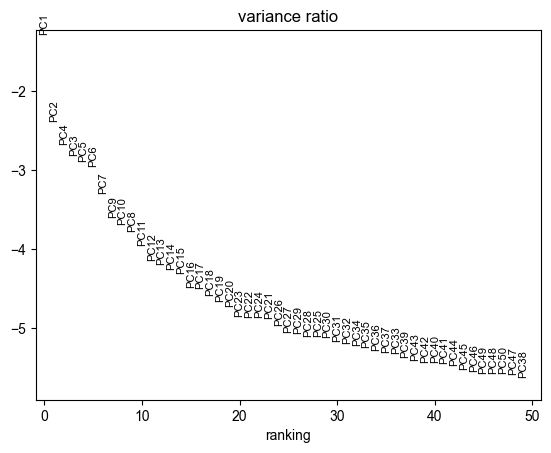

Varianza explicada acumulada:
PC10: 71.32%
PC20: 84.17%
PC50: 100.00%


In [8]:
import scanpy as sc
import matplotlib.pyplot as plt

# Cargar el dataset
adata = sc.read_h5ad("/Volumes/BioinforSSD/DATASETS_JUNE/REFERENCE_DATASET_GSE242424:23/READY_TO_USE_ON_scGPT_AS_REFERENCE_DATASET/reprogramming_reference_data.h5ad")

# Realizar PCA si no se ha hecho antes
if 'X_pca' not in adata.obsm.keys():
    sc.pp.pca(adata)

# Graficar el codo de varianza explicada
sc.pl.pca_variance_ratio(adata, n_pcs=50, log=True)
plt.title('PCA Variance Ratio - GSE242423')
plt.tight_layout()
plt.savefig('pca_variance_ratio_GSE242423.png')
plt.close()

print("Varianza explicada acumulada:")
print(f"PC10: {adata.uns['pca']['variance_ratio'].cumsum()[9]:.2%}")
print(f"PC20: {adata.uns['pca']['variance_ratio'].cumsum()[19]:.2%}")
print(f"PC50: {adata.uns['pca']['variance_ratio'].cumsum()[49]:.2%}")

KeyError: 'Could not find key sample in .var_names or .obs.columns.'

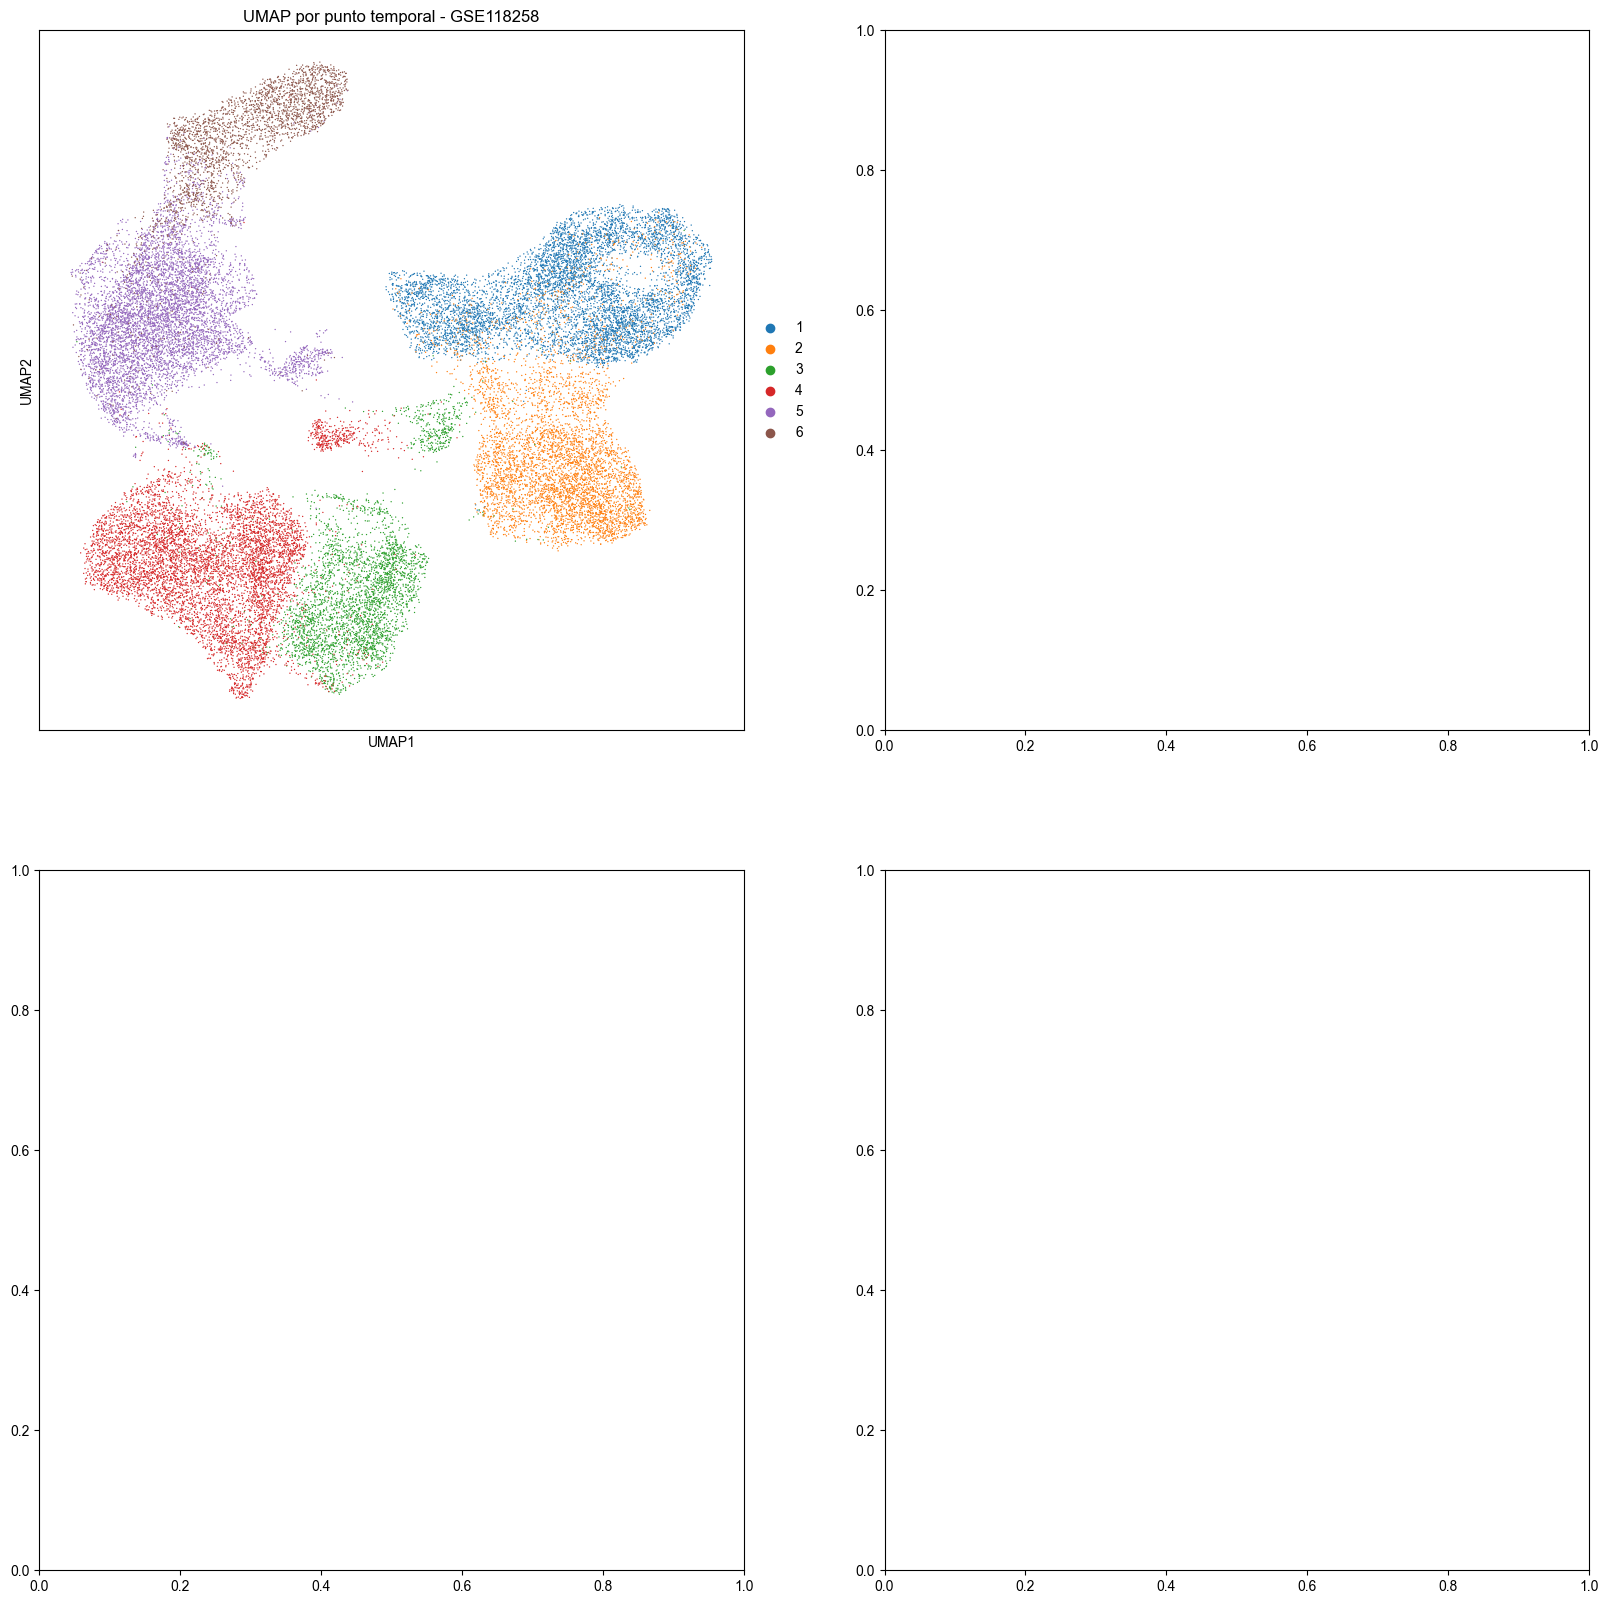

In [13]:
import scanpy as sc
import matplotlib.pyplot as plt

datasets = {
    'GSE118258': '/Volumes/BioinforSSD/DATASETS_JUNE/GSE118258/H5AD_FILES/GSE118258_scRNA_seq_analyzed_with_gene_names.h5ad',
    'GSE100344': '/Volumes/BioinforSSD/DATASETS_JUNE/GSE100344/H5AD_FILES/H5AD trimmed/GSE100344_trimmed.h5ad',
    'GSE242423': '/Volumes/BioinforSSD/DATASETS_JUNE/REFERENCE_DATASET_GSE242424:23/READY_TO_USE_ON_scGPT_AS_REFERENCE_DATASET/reprogramming_reference_data.h5ad'
}

fig, axs = plt.subplots(2, 2, figsize=(20, 20))
axs = axs.flatten()

for i, (name, path) in enumerate(datasets.items()):
    adata = sc.read_h5ad(path)
    
    if 'X_umap' not in adata.obsm:
        sc.pp.neighbors(adata)
        sc.tl.umap(adata)
    
    sc.pl.umap(adata, color='sample', ax=axs[i], show=False, title=f'UMAP por punto temporal - {name}')
    axs[i].set_xlabel('UMAP1')
    axs[i].set_ylabel('UMAP2')

# UMAP adicional para GSE242423 por tipo celular
adata = sc.read_h5ad(datasets['GSE242423'])
sc.pl.umap(adata, color='celltype', ax=axs[3], show=False, title='UMAP por tipo celular - GSE242423')
axs[3].set_xlabel('UMAP1')
axs[3].set_ylabel('UMAP2')

plt.tight_layout()
plt.savefig('umap_comparacion.png', dpi=300, bbox_inches='tight')
plt.close()

In [16]:
import scanpy as sc
import matplotlib.pyplot as plt

# Diccionario con las rutas de los archivos
datasets = {
    'GSE118258': '/Volumes/BioinforSSD/DATASETS_JUNE/GSE118258/H5AD_FILES/GSE118258_scRNA_seq_analyzed_with_gene_names.h5ad',
    'GSE100344': '/Volumes/BioinforSSD/DATASETS_JUNE/GSE100344/H5AD_FILES/H5AD trimmed/GSE100344_trimmed.h5ad',
    'GSE242423': '/Volumes/BioinforSSD/DATASETS_JUNE/REFERENCE_DATASET_GSE242424:23/READY_TO_USE_ON_scGPT_AS_REFERENCE_DATASET/reprogramming_reference_data.h5ad'
}

# Diccionario para asociar cada dataset con su columna relevante
color_dict = {
    'GSE118258': 'Time-point',  # Cambia 'Time-point' por el nombre correcto de columna si es necesario
    'GSE100344': 'treatment',   # Cambia 'treatment' por el nombre correcto de columna si es necesario
    'GSE242423': 'sample',      # Cambia 'sample' por el nombre correcto de columna si es necesario
}

fig, axs = plt.subplots(2, 2, figsize=(20, 20))
axs = axs.flatten()

for i, (name, path) in enumerate(datasets.items()):
    adata = sc.read_h5ad(path)
    
    # Usar el nombre de la columna correcto de color_dict
    if 'X_umap' not in adata.obsm:
        sc.pp.neighbors(adata)
        sc.tl.umap(adata)
    
    sc.pl.umap(adata, color=color_dict[name], ax=axs[i], show=False, title=f'UMAP por punto temporal - {name}')
    axs[i].set_xlabel('UMAP1')
    axs[i].set_ylabel('UMAP2')

# UMAP adicional para GSE242423 por tipo celular
adata = sc.read_h5ad(datasets['GSE242423'])
sc.pl.umap(adata, color='celltype', ax=axs[3], show=False, title='UMAP por tipo celular - GSE242423')
axs[3].set_xlabel('UMAP1')
axs[3].set_ylabel('UMAP2')

plt.tight_layout()
plt.savefig('umap_comparacion.png', dpi=300, bbox_inches='tight')
plt.close()
